Mean Squared Error (MSE): 0.53
R-squared (R²): 0.60


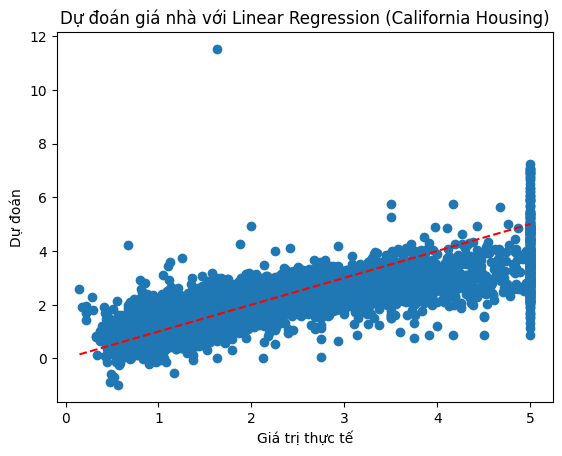

In [5]:
# 1. Import các thư viện cần thiết
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 2. Tải bộ dữ liệu California Housing
california_housing = fetch_california_housing()
X = california_housing.data  # Đặc trưng (features)
y = california_housing.target  # Nhãn (giá trị nhà)

# 3. Kiểm tra và xử lý giá trị thiếu (nếu có)
# Trong trường hợp dữ liệu có giá trị thiếu, sử dụng SimpleImputer để thay thế bằng giá trị trung bình
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Khởi tạo và huấn luyện mô hình Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 7. Dự đoán và đánh giá mô hình
y_pred = regressor.predict(X_test)

# Tính toán MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 8. Trực quan hóa kết quả (dự đoán vs thực tế)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Đường dự đoán lý tưởng
plt.xlabel("Giá trị thực tế")
plt.ylabel("Dự đoán")
plt.title("Dự đoán giá nhà với Linear Regression (California Housing)")
plt.show()
